# Theory Questions

In [1]:
#Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
#AnsAnomaly Detection is the process of identifying data points or patterns that deviate significantly from the expected or normal behavior. Such unusual observations are known as anomalies or outliers.

#Types of Anomalies

#Point Anomaly:
#A single data point differs notably from the rest.
#Example: A ₹5,00,000 transaction when most transactions range between ₹500–₹10,000.

#Contextual Anomaly:
#A data point is anomalous only within a specific context such as time, location, or season.
#Example: A temperature of 30°C in December (normal in June, but abnormal in winter).

#Collective Anomaly:
#A group of data points appears normal individually but collectively forms an unusual pattern.
#Example: Continuous high network traffic over time indicating a possible DDoS attack.

#Applications

#Anomaly detection is widely used in fraud detection, network security, health monitoring, and fault or system failure detection.

In [1]:
#Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.
#Ans  
#| **Algorithm**                                                            | **Approach**                  | **Key Idea**                                                                                                   | **Best For / Use Cases**                                                                     |  
#| ------------------------------------------------------------------------ | ----------------------------- | -------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------- |  
#| **Isolation Forest**                                                     | Tree-based ensemble method    | Detects anomalies by isolating data points through random partitioning; anomalies are easier to isolate as they are few and different. | Large-scale and high-dimensional datasets (e.g., fraud detection, server log analysis).      |  
#| **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** | Density-based clustering      | Forms clusters based on data density; points in low-density regions that don’t belong to any cluster are treated as anomalies. | Spatial or geometric data (e.g., GPS tracking, geospatial mapping, image segmentation).       |  
#| **Local Outlier Factor (LOF)**                                           | Density-based local deviation | Evaluates how much a data point’s local density deviates from that of its neighbors to identify local anomalies. | Data with non-uniform density (e.g., network intrusion detection, sensor or IoT data).       |  







In [5]:
#Question 3: What are the key components of a Time Series? Explain each with one example.
#Ans
#A Time Series is a sequence of data points recorded over time (e.g., daily temperature, monthly sales).
#It has four main components:
#Trend (T):
#The long-term upward or downward movement in data.
#Example: Company sales increasing steadily over years.
#Seasonality (S):
#Regular and repeating patterns that occur at fixed intervals (like monthly, quarterly, yearly).
#Example: Ice cream sales rising every summer and dropping in winter.
#Cyclic (C):
#Fluctuations that occur over longer, irregular periods, often linked to economic or business cycles.
#Example: Real estate prices rising and falling every few years.
#Irregular / Random (I):
#Unpredictable variations caused by random or unexpected events.
#Example: Sudden drop in airline travel due to a pandemic.

In [7]:
#Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?
#Ans
#A stationary time series is one whose mean, variance, and autocovariance remain constant over time.
#Stationarity can be tested using ADF (Augmented Dickey-Fuller) or KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests.
#If the series is non-stationary, it can be converted to stationary by applying differencing, log transformation, or detrending techniques.

In [9]:
#Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application
#Ans  
#| **Model**    | **Full Form**                              | **Structure**                                                                                                  | **Application**                                                            |  
#|--------------|---------------------------------------------|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------|  
#| **AR**       | Auto-Regressive                             | Uses past values of the series.  ( X_t = c + φ₁X_{t−1} + … + φₚX_{t−p} + ε_t )                                 | Suitable for data that shows correlation with its own past values.         |  
#| **MA**       | Moving Average                              | Uses past error terms.  ( X_t = c + θ₁ε_{t−1} + … + θ_qε_{t−q} + ε_t )                                         | Effective for data affected by random shocks or short-term fluctuations.   |  
#| **ARIMA**    | Auto-Regressive Integrated Moving Average    | Combines AR and MA with differencing (I). Represented as (p, d, q) model.                                       | Used for non-stationary data with trends but no seasonal pattern.          |  
#| **SARIMA**   | Seasonal ARIMA                              | Extends ARIMA by adding seasonal terms. Represented as (p, d, q)(P, D, Q)_s.                                   | Ideal for data with both trend and seasonality.                            |  
#| **SARIMAX**  | Seasonal ARIMA with eXogenous variables      | SARIMA model that also includes external predictors (X).                                                       | Best for seasonal data influenced by external factors (e.g., weather, prices). |  







# Practical Questions

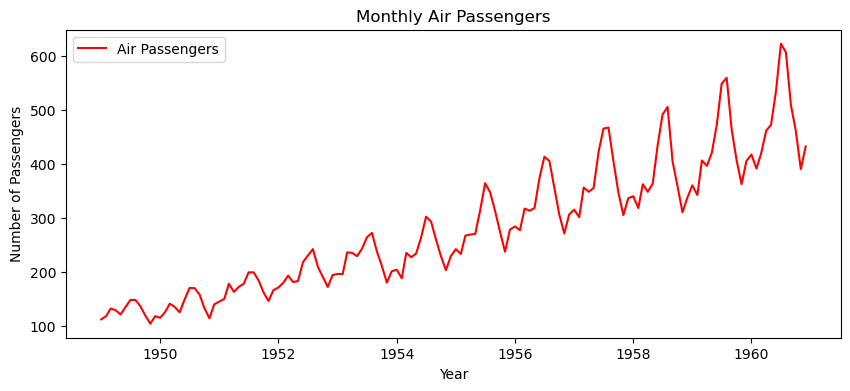

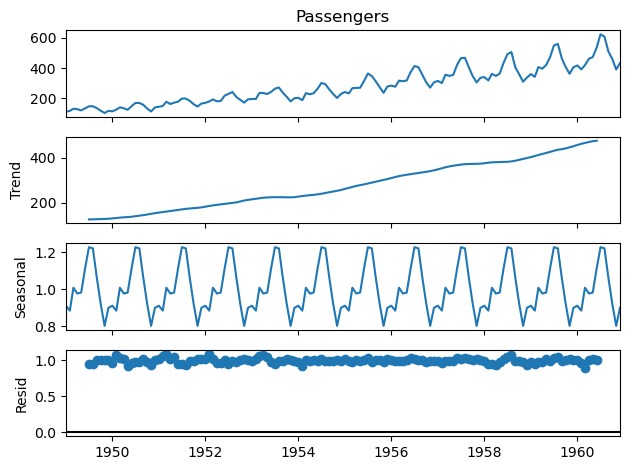

In [2]:
#Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,and decompose it into trend, seasonality, and residual components
#Ans


import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv("AirPassengers (1).csv")

# Rename the column for simplicity
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Convert Month to datetime and set as index
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the original time series
plt.figure(figsize=(10,4))
plt.plot(data['Passengers'], label='Air Passengers', color='red')
plt.title('Monthly Air Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Decompose the series (multiplicative model)
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# Plot trend, seasonality, and residuals
decomposition.plot()
plt.tight_layout()
plt.show()

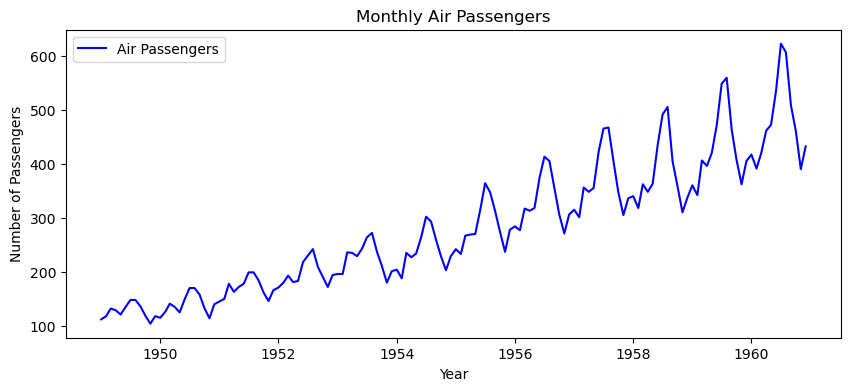

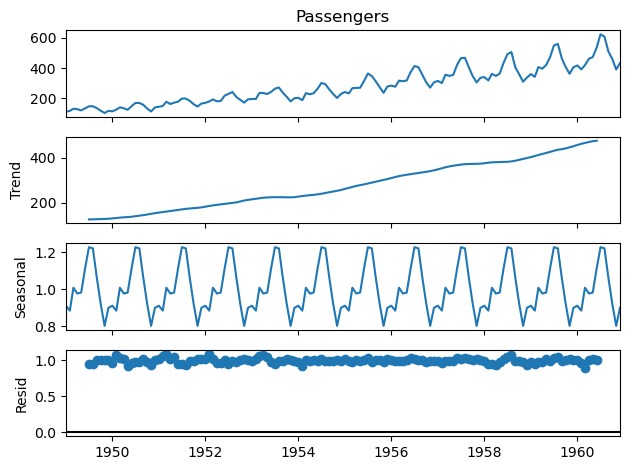

In [ ]:
#Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load and sample data
data = pd.read_csv("NYC_taxi_fare_data.csv").sample(10000, random_state=42)

# Use existing numerical columns
df = data[['fare_amount', 'trip_distance', 'passenger_count', 'tip_amount', 'total_amount']].copy()
df = df.dropna()

# Fit Isolation Forest
model = IsolationForest(contamination=0.03, random_state=42)
df['anomaly'] = model.fit_predict(df)

# Visualization (2D scatter of fare vs distance)
plt.figure(figsize=(8,5))
plt.scatter(df['trip_distance'], df['fare_amount'],
            c=df['anomaly'], cmap='cool', s=10)
plt.title("Isolation Forest - NYC Taxi Fare Anomalies")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_6420\2953353614.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NYC_taxi_fare_data.csv").sample(10000, random_state=42)


In [ ]:
#Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.
# Question 8: Forecasting using SARIMA on AirPassengers dataset

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load dataset
data = pd.read_csv("AirPassengers (1).csv")
data.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Train SARIMA model (example order values)
model = SARIMAX(data['Passengers'],
                order=(1,1,1),           # ARIMA part (p,d,q)
                seasonal_order=(1,1,1,12), # Seasonal part (P,D,Q,s)
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_index = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1),
                               periods=12, freq='MS')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(data.index, data['Passengers'], label='Observed', color='red')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='blue')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1],
                 color='pink', alpha=0.3)
plt.title('SARIMA Forecast: Monthly Air Passengers')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [17]:
#Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib

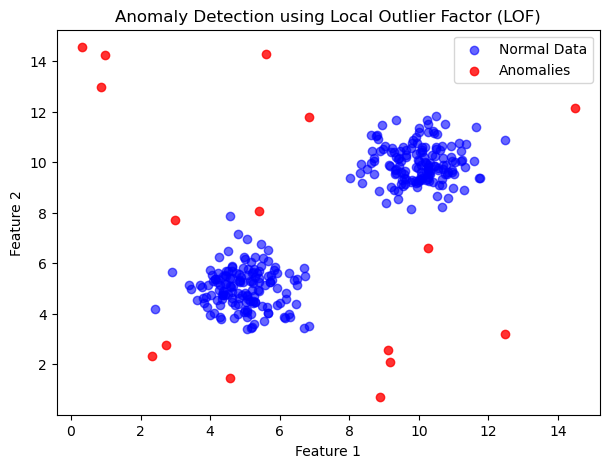

In [18]:
#Ans
# Question 9: Anomaly Detection using Local Outlier Factor (LOF)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Create a synthetic numerical dataset
X, _ = make_blobs(n_samples=300, centers=[[5,5],[10,10]], cluster_std=0.8, random_state=42)

# Add some random outliers
rng = np.random.RandomState(42)
outliers = rng.uniform(low=0, high=15, size=(20, 2))
X = np.concatenate([X, outliers], axis=0)

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)

# Separate normal points and anomalies
normal = X[y_pred == 1]
anomalies = X[y_pred == -1]

# Visualize the results
plt.figure(figsize=(7,5))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label='Normal Data', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies', alpha=0.8)
plt.title('Anomaly Detection using Local Outlier Factor (LOF)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [19]:
#Question 10: You are working as a data scientist for a power grid monitoring company.
#Your goal is to forecast energy demand and also detect abnormal spikes or drops in
#real-time consumption data collected every 15 minutes. The dataset includes features
#like timestamp, region, weather conditions, and energy usage.
#Explain your real-time data science workflow:
#● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
#DBSCAN)?
#● Which time series model would you use for short-term forecasting (ARIMA /
#SARIMA / SARIMAX)?
#● How would you validate and monitor the performance over time?
#● How would this solution help business decisions or operations?

In [20]:
#Ans
#Anomaly Detection: Use Isolation Forest for real-time spikes/drops — fast, scalable, and works well with streaming data.
#Forecasting: Use SARIMAX for short-term energy demand — handles seasonality and weather effects.
#Validation: Monitor using RMSE (forecast) and F1-score (anomalies); retrain models regularly.
#Business Impact: Enables early fault detection, better load management, cost reduction, and reliable power supply.